**Hough's Transform circles**

1. Hough's Transform for circles is a powerful technique used to detect circular shapes in an image. It is an extension of the Hough Transform, which is typically used for detecting lines. The idea is to find circles that best fit a set of points in an image.

2. Given an edge point, we compute all the possible circle centers that could include the current point on their circumference for a given radius.

3. To do this, we calculate the center of the circle with respect to various angles and the radius. We then "vote" for the (h, k) values (circle centers) obtained from these calculations. The circle center (h, k) and radius that receive the maximum votes correspond to the most likely circle, which is drawn using the detected points as references.



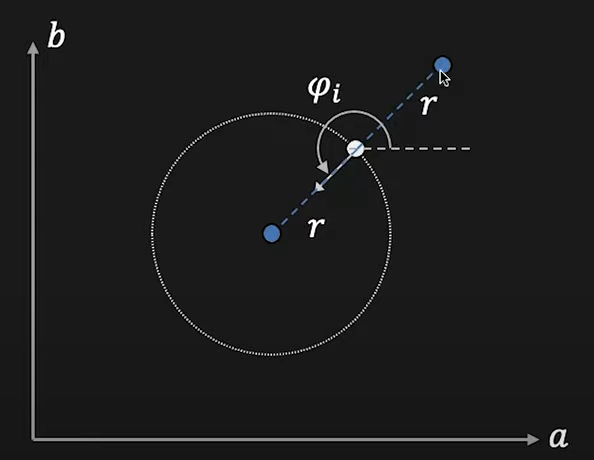

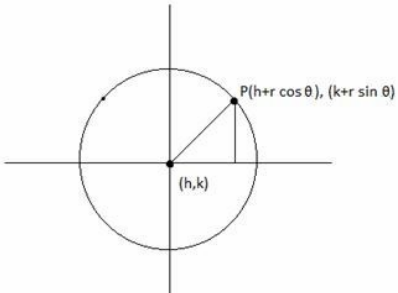

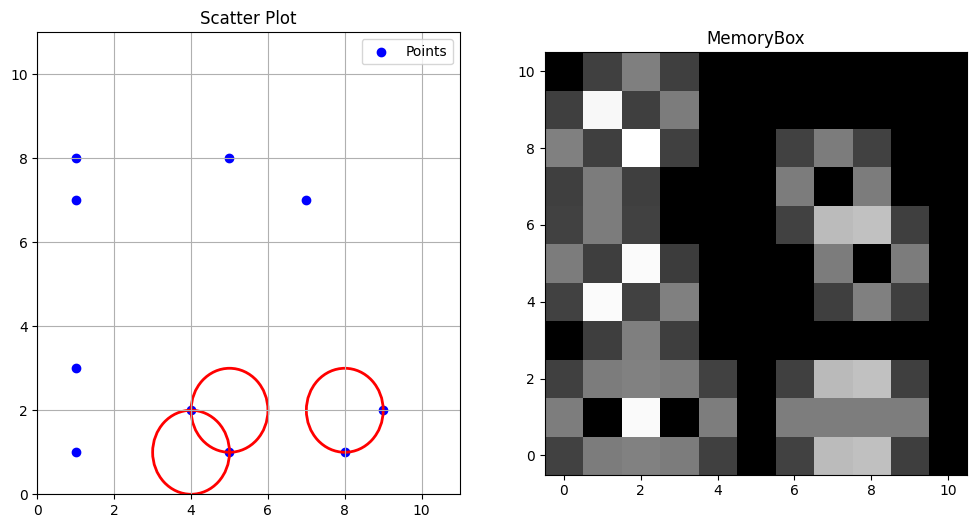

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Generate random coordinates
limit = 10
radi=1
x = [np.random.randint(1, 10) for _ in range(limit)]
y = [np.random.randint(1, 10) for _ in range(limit)]

# Initialize MemoryBox
MemoryBox = np.zeros((11, 11))

for i, j in zip(x, y):
    for teta in range(0, 360):
        # Convert degrees to radians
        theta_rad = math.radians(teta)

        # Calculate new positions based on angle
        a1 = int(round(i + radi*np.cos(theta_rad)))
        a2 = int(round(i - radi*np.cos(theta_rad)))
        b1 = int(round(j + radi*np.sin(theta_rad)))
        b2 = int(round(j - radi*np.sin(theta_rad)))

        # Ensure indices are within bounds
        if 0 <= a1 < 11 and 0 <= b1 < 11:
            MemoryBox[a1][b1] += 1
        if 0 <= a2 < 11 and 0 <= b2 < 11:
            MemoryBox[a2][b2] += 1

# Find the top 3 maximum points in MemoryBox
flat_indices = np.argsort(MemoryBox.ravel())[-3:]  # Indices of top 3 values
top_indices = np.unravel_index(flat_indices, MemoryBox.shape)  # Convert to 2D indices

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(x, y, c='blue', label='Points')
plt.title('Scatter Plot')
plt.xlim(0, 11)
plt.ylim(0, 11)
# Draw circles for the top 3 points in the scatter plot
plt.grid(True)
plt.legend()
for idx in range(3):
    circle = plt.Circle((top_indices[0][idx],top_indices[1][idx]), radius=radi, color='red', fill=False, linewidth=2)
    plt.gca().add_patch(circle)
# MemoryBox plot
plt.subplot(1, 2, 2)
plt.imshow(MemoryBox, cmap="gray", origin='lower')
plt.title('MemoryBox')
# Draw circles at the top 3 points with radius 1
plt.show()